In [0]:
from google.colab import drive
import os
import sys
drive.mount('/content/drive')
dep_path = os.getcwd()+'/drive/My Drive/datasets'
sys.path.insert(0, "/content/drive/My Drive/datasets/")
os.listdir(dep_path)
fl = dict()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from numpy.random import random_sample
from math import sqrt, log
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn.metrics import calinski_harabaz_score


In [0]:
kmax = max_k = 15

### DATA SETS 

####Audio

In [0]:
load = np.load(dep_path+"/clustering/mfcc_features.npy").item()
X = np.array(load['mfcc'],dtype = np.float32)
Y = np.array(load['label'])
num_classes = 41

#### iris dataset

In [0]:
X = load_iris().data
Y = load_iris().target
num_classes = 3

#### Yeast dataset

In [0]:
import csv
with open(dep_path+'/clustering/yeast_csv.csv', 'r') as f:
    yeast = list(csv.reader(f, delimiter=','))
X = np.array(yeast)
#labels
Y = X[1:,-1]
#features
X = X[1:,:-2].astype(np.float32)
num_classes = np.unique(np.array(yeast)[:,-1]).shape[0]-1
print(num_classes)


#### Glass dataset

In [0]:
import csv
with open(dep_path+'/clustering/glass.csv', 'r') as f:
    yeast = list(csv.reader(f, delimiter=','))
X = np.array(yeast)
#labels
Y = X[1:,-1]
#features
X = X[1:,:-1].astype(np.float32)
num_classes = np.unique(np.array(yeast)[:,-1]).shape[0]
print(num_classes)

7


####MNIST

In [0]:
import csv
import os
import load_mnist
_,Y,_,_ = load_mnist.load_mnist_dataset(dep_path+'/fashion')
with open(dep_path+'/clustering/encodef_stack100.csv', 'r') as f:
    yeast = list(csv.reader(f, delimiter=','))
X = np.array(yeast)
X = X.astype(np.float32)
num_classes = 10
print(num_classes)

####MNIST PCA

In [0]:
import load_mnist
import os
mnist = dict()
mnist['train_x'],mnist['train_y'],mnist['test_x'],mnist['test_y'] = load_mnist.load_mnist_dataset(dep_path+'/mnist')
X = mnist['train_x'].reshape(-1,28*28)
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(X.astype(np.float32))
X = data
Y = mnist['train_y']
num_classes = 10
print(X.shape)

### preprocessing

In [0]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

### programs

In [0]:
def get_cluster_centers(l,x):
    c = []
    for i in np.unique(l):
        index = np.argwhere(l==i).reshape(-1)
        cls = np.take(x,index,axis=0)
        #print(cls.shape)
        c.append(cls.mean(axis=0).tolist())
        #print(c[i])
    return c

def get_inertia(l,x):
    sse = 0
    c = np.array(get_cluster_centers(l,x))
    c = c.reshape(c.shape[0],-1,c.shape[1])
    for i in np.unique(l):
        index = np.argwhere(l==i).reshape(-1)
        cls = np.take(x,index,axis=0)
        #print(cls.shape)
        cls = ((cls-c)**2).sum(axis=2)
        #print(cls.shape)
        cls = cls.min(axis=0).sum()
        #print(cls)
        sse+=cls
    return sse

### GMM using Elbow 

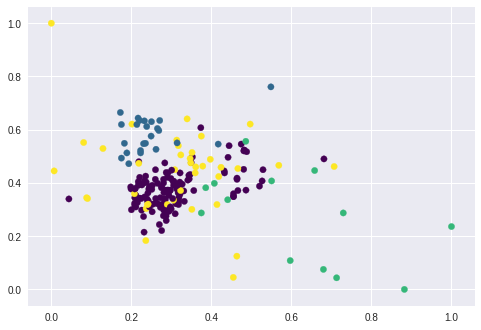

In [0]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

for cluster K  : 1
for cluster K  : 2
for cluster K  : 3
for cluster K  : 4
for cluster K  : 5
for cluster K  : 6
for cluster K  : 7
for cluster K  : 8
for cluster K  : 9
for cluster K  : 10
for cluster K  : 11
for cluster K  : 12
for cluster K  : 13
for cluster K  : 14
for cluster K  : 15


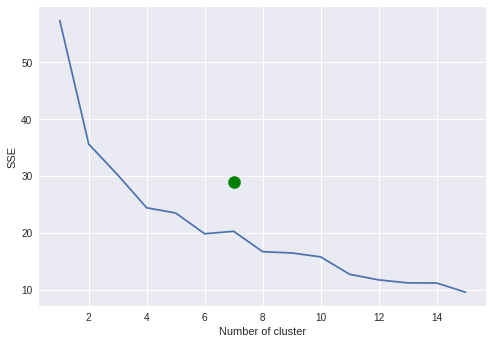

In [0]:
sse = {}
gm_p = list()
for k in range(1, kmax+1):
    print("for cluster K  : {}".format(k))
    kmeans = GaussianMixture(n_components=k, n_init=3).fit(X)
    label = kmeans.predict(X)
    gm_p.append(label)
    #print(data["clusters"])
    sse[k] = get_inertia(label,X) # Inertia: Sum of distances of samples to their closest cluster center

fl['sse'] = sse
fl['sse_c'] =  get_inertia(Y,X)
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.scatter( num_classes, fl['sse_c'],s=150, c='g')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


###  using Silhouette scores

For cluster : 2, The Silhouette Coefficient is 0.4
For cluster : 3, The Silhouette Coefficient is 0.283
For cluster : 4, The Silhouette Coefficient is 0.35
For cluster : 5, The Silhouette Coefficient is 0.233
For cluster : 6, The Silhouette Coefficient is 0.243
For cluster : 7, The Silhouette Coefficient is 0.26
For cluster : 8, The Silhouette Coefficient is 0.209
For cluster : 9, The Silhouette Coefficient is 0.221
For cluster : 10, The Silhouette Coefficient is 0.282
For cluster : 11, The Silhouette Coefficient is 0.259
For cluster : 12, The Silhouette Coefficient is 0.347
For cluster : 13, The Silhouette Coefficient is 0.315
For cluster : 14, The Silhouette Coefficient is 0.324
For cluster : 15, The Silhouette Coefficient is 0.213


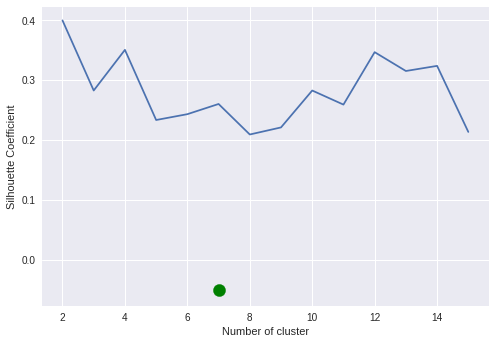

In [0]:

silhouette_coeff = {}

for n_cluster in range(2, kmax+1):
    kmeans = GaussianMixture(n_components=n_cluster, n_init=3).fit(X)
    label = kmeans.predict(X)
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    silhouette_coeff[n_cluster] = sil_coeff
    print("For cluster : {}, The Silhouette Coefficient is {:.3}".format(n_cluster, sil_coeff))

fl['silh'] = silhouette_coeff
fl['silh_c'] = silhouette_score(X, Y, metric='euclidean')
plt.figure()
plt.plot(list(silhouette_coeff.keys()), list(silhouette_coeff.values()))
plt.scatter( num_classes, fl['silh_c'],s=150, c='g')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()



### GAP statistics 

In [0]:


def get_rand_data(col):

    rng = col.max() - col.min()

    return pd.Series(random_sample(len(col))*rng + col.min())



def iter_kmeans(df, n_clusters, num_iters=5):

    rng =  range(1, num_iters + 1)
    vals = pd.Series(index=rng)
    for i in rng:
        k = GaussianMixture(n_components=n_clusters, n_init=3)
        k.fit(df)
        labels = k.predict(df)
        #print ("Ref k: {}".format(k.get_params()['n_clusters']))
        vals[i] = get_inertia( labels, np.array(df))
    return vals



def gap_statistic(df, max_k=10):
    gaps = pd.Series(index = range(1, max_k + 1))
    for k in range(1, max_k + 1):
        km_act = GaussianMixture(n_components=k, n_init=3)
        km_act.fit(df)
        labels = km_act.predict(df)
        # get ref dataset
        ref = df.apply(get_rand_data)
        ref_inertia = iter_kmeans(ref, n_clusters=k).mean()
        gap = log(abs(ref_inertia - get_inertia(labels,np.array(df))))
        print("Ref: {} Act: {}  Gap: {}".format( ref_inertia, get_inertia(labels,np.array(df)), gap))
        gaps[k] = gap
    return gaps

In [0]:
# famous iris data set
df = pd.DataFrame(X)
gaps = gap_statistic(df,kmax)

Ref: 160.40971342312923 Act: 57.3642338528977  Gap: 4.635170440001011
Ref: 146.4357162920366 Act: 35.4622425653722  Gap: 4.7092911973176985
Ref: 130.58653628397707 Act: 30.18929265248283  Gap: 4.609134753011185
Ref: 128.36644506446927 Act: 25.023055329968013  Gap: 4.638057324087099
Ref: 114.49399316828696 Act: 21.815966351370555  Gap: 4.529131409058255
Ref: 110.89277464036454 Act: 22.82125185944914  Gap: 4.478149243242606
Ref: 110.51096991470408 Act: 19.022650642330543  Gap: 4.516211305907045
Ref: 102.0955842756389 Act: 17.244051751793545  Gap: 4.440903053082777
Ref: 102.91623254366425 Act: 15.961101737208347  Gap: 4.465392247759243
Ref: 96.16578802108347 Act: 13.851758660872369  Gap: 4.410541559257529
Ref: 93.25876058833958 Act: 12.38058777754752  Gap: 4.39294398309689
Ref: 92.80268952096432 Act: 11.18583284795911  Gap: 4.40203581751106
Ref: 88.99923875289431 Act: 10.596157587380503  Gap: 4.361863227164648
Ref: 88.23372521432204 Act: 10.763543518928653  Gap: 4.349893110005633
Ref: 82.

In [0]:
gap = np.array(gaps)
fl['gap'] = gap
fl['gap_c'] = log( iter_kmeans(df.apply(get_rand_data), n_clusters=num_classes).mean() - get_inertia(Y,X))
print(fl['gap_c'])
gap.argmax()+1

4.424056245677984


2

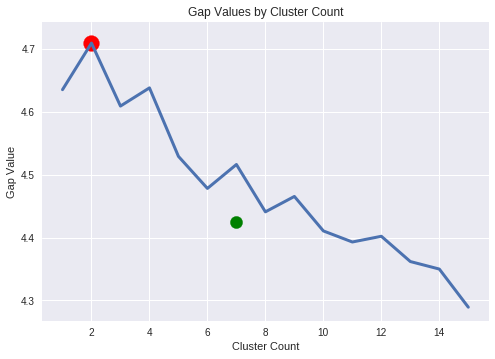

In [0]:
plt.plot(range(1,kmax+1),gap, linewidth=3)
plt.scatter(gap.argmax()+1, gap.max(), s=250, c='r')
plt.scatter( num_classes, fl['gap_c'],s=150, c='g')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

### 4.  Calinski-Harabaz Index 

In [0]:

CHI = pd.Series(index = range(2, max_k + 1))
for k in range(2, max_k+1):
  print(k)
  gmm = GaussianMixture(n_components=k).fit(X)
  labels = gmm.predict(X)
  #print(data["clusters"])
  CHI[k] = calinski_harabaz_score(X, labels) 

2
3
4
5
6
7
8
9
10
11
12
13
14
15


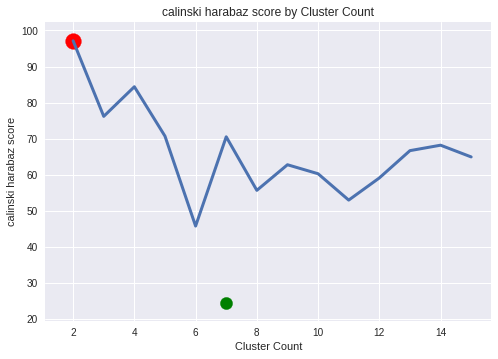

In [0]:
fl['chi'] = CHI
fl['chi_c'] = calinski_harabaz_score(X, Y) 
plt.plot(CHI, linewidth=3)
plt.scatter(CHI.values.argmax()+2, CHI.max(), s=250, c='r')
plt.scatter( num_classes, fl['chi_c'],s=150, c='g')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('calinski harabaz score')
plt.title('calinski harabaz score by Cluster Count')
plt.show()

### 5. BIC and AIC

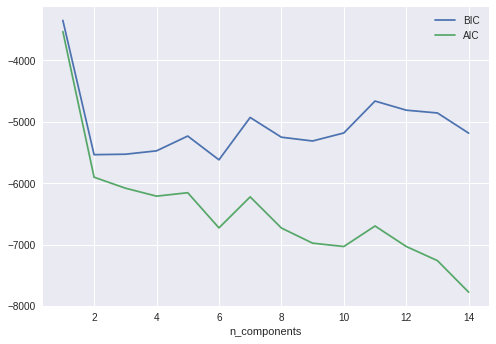

In [0]:
n_components = np.arange(1, kmax)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [0]:
np.array(get_cluster_centers(GaussianMixture(n_components=3, n_init=3).fit(X).predict(X),X)).shape

(3, 9)

In [0]:
name = os.getcwd()+"/drive/My Drive/outputs/"+"GMM_gl.npy"
np.save(name,fl)

"""#saving file from colab
from google.colab import files
files.download(name)
"""

'#saving file from colab\nfrom google.colab import files\nfiles.download(name)\n'